# Linear Regression

In [43]:
import numpy as np

In [165]:
X = np.array([[1],[2],[3],[4]])

In [166]:
Y = np.array([1,2,3,4])

In [167]:
class LinearRegression:
    def __init__(self, eta = 0.1, n_iter = 50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self,X,Y):
        self.X = np.insert(X,0,1,axis = 1) #add  in the X
        self.Y = Y
        self.w = np.ones(self.X.shape[1]) 
        m = self.X.shape[0]
        for i in range(self.n_iter):
            output = self.X.dot(self.w)
            error = self.Y - output
            if  i%10 == 0:
                print(self.w)
                print(sum(error**2))
            self.w += self.eta / m * error.dot(self.X) #update rule
        return self
    
    def predict(self,X):
        return np.insert(X,0,1,axis=1).dot(self.w)
        

In [168]:
lr = LinearRegression()

In [169]:
o=lr.fit(X,Y)

[1. 1.]
4.0
[0.77082525 0.73782542]
0.39693584842182256
[0.66290707 0.77453076]
0.2935714144232121
[0.57009781 0.80609722]
0.21712368814533947
[0.49028216 0.83324428]
0.16058340028254167


In [117]:
lr.X.shape

(4, 3)

In [120]:
lr.predict(np.array([[1,1]]))

array([1.97854687])

# Linear regression II

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines

In [2]:
def loadDataset(filename):
    numFeat = len(open(filename).readline().split("\t")) - 1
    fr = open(filename)
    feature = []
    label = []
    for line in fr.readlines():
        data = line.strip().split("\t")
        tempFeat = []
        for i in range(numFeat):
            tempFeat.append(float(data[i]))
        feature.append(tempFeat)
        label.append(float(data[-1]))
    return feature,label

In [259]:
X,Y = loadDataset("ex0.txt")

In [260]:
X

[[1.0, 0.067732],
 [1.0, 0.42781],
 [1.0, 0.995731],
 [1.0, 0.738336],
 [1.0, 0.981083],
 [1.0, 0.526171],
 [1.0, 0.378887],
 [1.0, 0.033859],
 [1.0, 0.132791],
 [1.0, 0.138306],
 [1.0, 0.247809],
 [1.0, 0.64827],
 [1.0, 0.731209],
 [1.0, 0.236833],
 [1.0, 0.969788],
 [1.0, 0.607492],
 [1.0, 0.358622],
 [1.0, 0.147846],
 [1.0, 0.63782],
 [1.0, 0.230372],
 [1.0, 0.070237],
 [1.0, 0.067154],
 [1.0, 0.925577],
 [1.0, 0.717733],
 [1.0, 0.015371],
 [1.0, 0.33507],
 [1.0, 0.040486],
 [1.0, 0.212575],
 [1.0, 0.617218],
 [1.0, 0.541196],
 [1.0, 0.045353],
 [1.0, 0.126762],
 [1.0, 0.556486],
 [1.0, 0.901144],
 [1.0, 0.958476],
 [1.0, 0.274561],
 [1.0, 0.394396],
 [1.0, 0.87248],
 [1.0, 0.409932],
 [1.0, 0.908969],
 [1.0, 0.166819],
 [1.0, 0.665016],
 [1.0, 0.263727],
 [1.0, 0.231214],
 [1.0, 0.552928],
 [1.0, 0.047744],
 [1.0, 0.365746],
 [1.0, 0.495002],
 [1.0, 0.493466],
 [1.0, 0.792101],
 [1.0, 0.76966],
 [1.0, 0.251821],
 [1.0, 0.181951],
 [1.0, 0.808177],
 [1.0, 0.334116],
 [1.0, 0.33863],

In [235]:
X = np.array(X)
Y = np.array(Y)
Xmat = np.mat(X)
Ymat = np.mat(Y)

In [341]:
lr = LinearRegression(n_iter = 100)
lr.fit(X,Y)
Yp = lr.predict(X)

/home/marinex/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


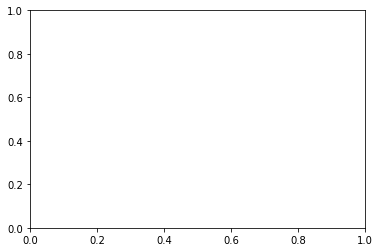

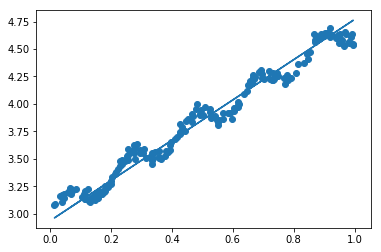

In [187]:
x1,x2,y1,y2 = plt.axis()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X.flatten(),Y.flatten())
ay = fig.add_subplot(111)
ay.plot(X,Yp)
plt.show()

# linear Regression normal equation

In [307]:
class LinearRegression:
    def __init__(self, eta = 0.1, n_iter = 50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self,X,Y):
        X = np.insert(X,0,1,axis = 1)
        self.X = np.mat(X)
        self.Y = np.mat(Y).T
        if(np.linalg.det(self.X.T*self.X)==0):
            print("matrix is singular")
            return
        self.w = (((self.X.T*self.X).I)*self.X.T)*self.Y
        
        
        return self
    
    def predict(self,X):
        return np.insert(X,0,1,axis=1).dot(self.w)
        

In [308]:
X,Y = loadDataset("data.txt") 
X = np.array(X)
Y = np.array(Y)

In [309]:
lr = LinearRegression()

In [310]:
lr.fit(X,Y)

In [311]:
lr.w

matrix([[3.00774324],
        [1.69532264]])

In [319]:
Yp = np.array(lr.predict(X))
ind_y = Y.argsort(0)

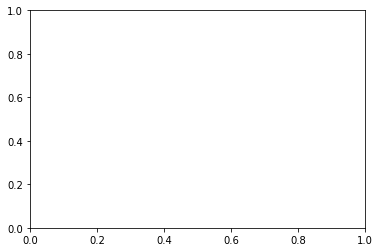

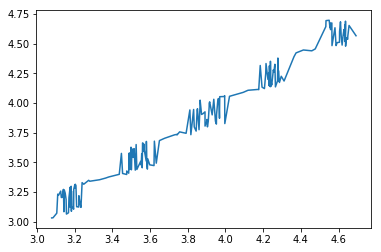

In [320]:
x1,x2,y1,y2 = plt.axis()
fig = plt.figure()
#ax = fig.add_subplot(111)
#ax.scatter(X.flatten(),Y.flatten())
ay = fig.add_subplot(111)
ay.plot(Y[ind_y],Yp[ind_y])
plt.show()

# Linear Regression with local weight

In [345]:
class LinearRegression:
    def __init__(self, k = 1.0):
        self.k = k
        
    def fit(self,X,Y):
        X = np.insert(X,0,1,axis = 1)
        self.X = np.mat(X)
        self.Y = np.mat(Y).T
        
    def predict(self,x):
        x = np.insert(x,0,1)
        m = self.X.shape[0]
        weightxy = np.mat(np.eye(m))
        for i in range(m):
            diff = x - self.X[i,:]
            weightxy[i,i] = np.exp((diff*diff.T)/(-2.0*self.k**2.0))
        XT = self.X.T*(weightxy*self.X)
        if(np.linalg.det(XT) == 0.0):
            print("matrix is singular")
            return
        self.w =  XT.I * self.X.T * weightxy *self.Y
        return float(x.dot(self.w))

    
    def predictTest(self,test_X):
        output = []
        for x in test_X:
            output.append(self.predict(x))
        return output

In [346]:
lr = LinearRegression(k=0.003)

In [347]:
lr.fit(X,Y)

In [348]:
lr.predict(X[0])

3.202006648982686

In [349]:
ind = X.argsort(0)

In [350]:
y_predict =np.array(lr.predictTest(X))


/home/marinex/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


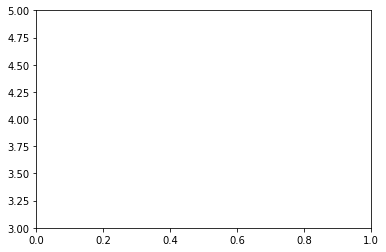

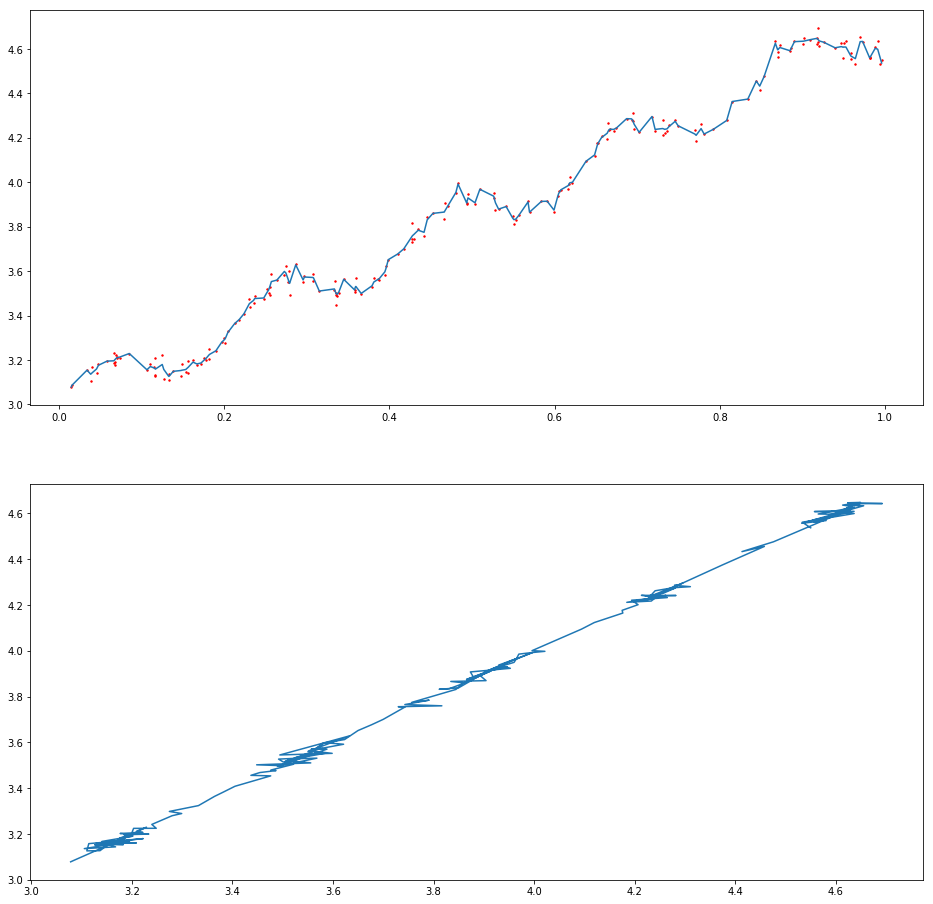

In [371]:
x1,x2,y1,y2 = plt.axis()
plt.ylim(3.0,5.0)
fig = plt.figure(figsize = (16,16))
ax = fig.add_subplot(211)
ax.scatter(X.flatten(),Y.flatten(),s=2,c="red")
ay = fig.add_subplot(211)
#line = lines.Line2D(X,y_predict)
#ay.add_line(line)
ay.plot(X[ind][:,0,:],y_predict[ind])

az = fig.add_subplot(2,1,2)
az.plot(Y[ind],y_predict[ind])


In [366]:
Y[ind].shape

(200, 1)

In [344]:
y_predict[ind].shape

(200, 1)

In [354]:
X[ind][:,0,:].shape

(200, 1)